In [5]:
import pandas as pd 
# Loading the ingredients into the container (The DataFrame)
df = pd.read_csv(r"C:\Users\acer\Downloads\LI-Small_Trans.csv")
df.head(10)


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,12.32,US Dollar,12.32,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2941.56,US Dollar,2941.56,US Dollar,Reinvestment,0
5,2022/09/01 00:24,12,8006ADD30,12,8006ADD30,6473.62,US Dollar,6473.62,US Dollar,Reinvestment,0
6,2022/09/01 00:17,11,800059120,1217,8006AD4E0,60562.00,US Dollar,60562.00,US Dollar,ACH,0
7,2022/09/01 00:07,11,8000ECA90,11,8000ECA90,22.97,US Dollar,22.97,US Dollar,Reinvestment,0
8,2022/09/01 00:28,1120,8006AA910,243166,81470DCF0,43.53,US Dollar,43.53,US Dollar,Credit Card,0
9,2022/09/01 00:22,1217,8006AD4E0,1217,8006AD4E0,5.04,US Dollar,5.04,US Dollar,Reinvestment,0


In [6]:
# The "Time Machine" code: converting the column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sorting the data by date (essential for time-series analysis like AML)
df = df.sort_values(by='Timestamp')
df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
12231,2022-09-01,1807,801321C30,1807,801321C30,220579.84,US Dollar,220579.84,US Dollar,Reinvestment,0
225844,2022-09-01,129759,80DBF72D0,129759,80DBF72D0,34167.89,Euro,34167.89,Euro,Reinvestment,0
42017,2022-09-01,22086,806636010,22086,806636010,24.63,US Dollar,24.63,US Dollar,Reinvestment,0
344938,2022-09-01,29,80C66BDE0,29,80C66BDE0,0.48,UK Pound,0.48,UK Pound,Reinvestment,0
162624,2022-09-01,19085,8081D8EE0,137029,81B71B370,16077.82,US Dollar,16077.82,US Dollar,Credit Card,0
162607,2022-09-01,350890,81B716090,350890,81B716090,1257.13,US Dollar,1257.13,US Dollar,Reinvestment,0
42020,2022-09-01,21393,800A94890,5394,80663F550,6489.59,US Dollar,6489.59,US Dollar,Credit Card,0
344958,2022-09-01,8,80591CA70,8,80591CA70,68347.82,UK Pound,68347.82,UK Pound,Reinvestment,0
412770,2022-09-01,217,817309240,217,817309240,73.03,Saudi Riyal,73.03,Saudi Riyal,Reinvestment,0
225855,2022-09-01,600,80DC46E70,600,80DC46E70,17651.77,Euro,17651.77,Euro,Reinvestment,0


In [7]:
df.columns
df.rename(columns={'Account': 'Account_From'}, inplace=True)
df.rename(columns={'Account.1': 'Account_To'}, inplace=True)
df.head(10)

,Timestamp,From Bank,Account_From,To Bank,Account_To,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
12231,2022-09-01,1807,801321C30,1807,801321C30,220579.84,US Dollar,220579.84,US Dollar,Reinvestment,0
225844,2022-09-01,129759,80DBF72D0,129759,80DBF72D0,34167.89,Euro,34167.89,Euro,Reinvestment,0
42017,2022-09-01,22086,806636010,22086,806636010,24.63,US Dollar,24.63,US Dollar,Reinvestment,0
344938,2022-09-01,29,80C66BDE0,29,80C66BDE0,0.48,UK Pound,0.48,UK Pound,Reinvestment,0
162624,2022-09-01,19085,8081D8EE0,137029,81B71B370,16077.82,US Dollar,16077.82,US Dollar,Credit Card,0
162607,2022-09-01,350890,81B716090,350890,81B716090,1257.13,US Dollar,1257.13,US Dollar,Reinvestment,0
42020,2022-09-01,21393,800A94890,5394,80663F550,6489.59,US Dollar,6489.59,US Dollar,Credit Card,0
344958,2022-09-01,8,80591CA70,8,80591CA70,68347.82,UK Pound,68347.82,UK Pound,Reinvestment,0
412770,2022-09-01,217,817309240,217,817309240,73.03,Saudi Riyal,73.03,Saudi Riyal,Reinvestment,0
225855,2022-09-01,600,80DC46E70,600,80DC46E70,17651.77,Euro,17651.77,Euro,Reinvestment,0


In [8]:
print(df['Payment Format'].unique())

['Reinvestment' 'Credit Card' 'ACH' 'Wire' 'Cheque' 'Cash' 'Bitcoin']


In [9]:
suspicious_deposits = df[
    (df['Payment Format'] == 'Cash') &
    (df['Amount Received'] > 600)
]
suspicious_deposits.head(10)

,Timestamp,From Bank,Account_From,To Bank,Account_To,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
225478,2022-09-01,6971,802B4B9F0,230153,80DAC0150,25363.12,Euro,25363.12,Euro,Cash,0
345262,2022-09-01,24,80C28B710,233601,80C6B53A0,109347.47,UK Pound,109347.47,UK Pound,Cash,0
343598,2022-09-01,7,80009C030,7,80C287950,70913.40,UK Pound,70913.40,UK Pound,Cash,0
227104,2022-09-01,24027,8066DC720,225265,80E1D7790,86954.07,Euro,86954.07,Euro,Cash,0
116662,2022-09-01,1807,8023A8A80,11,813A63180,38393.39,US Dollar,38393.39,US Dollar,Cash,0
226579,2022-09-01,14003,802B92330,32453,80DDF1150,17682.64,Euro,17682.64,Euro,Cash,0
42278,2022-09-01,1217,802D326D0,5394,806770250,1840.46,US Dollar,1840.46,US Dollar,Cash,0
346805,2022-09-01,33370,80C9F76B0,133159,80CA1A220,4450.12,UK Pound,4450.12,UK Pound,Cash,0
91085,2022-09-01,129050,80AE4CB20,15284,80E8A8300,36601.13,US Dollar,36601.13,US Dollar,Cash,0
14544,2022-09-01,1422,8014C7B60,1110,8017559F0,689.98,US Dollar,689.98,US Dollar,Cash,0


In [10]:
# Creating the summary table (make sure it's lower-case to avoid future errors)
deposit_counts = suspicious_deposits.groupby('Account_From').size().reset_index(name='Deposit_Count')

# Filtering new table for the high-risk outliers (> 10,000 deposits)
high_risk_accounts = deposit_counts[
    deposit_counts['Deposit_Count'] > 10000
]

print("--- HIGH-RISK ACCOUNTS (RULE 1: FREQUENCY) ---")
print(high_risk_accounts)

--- HIGH-RISK ACCOUNTS (RULE 1: FREQUENCY) ---
  Account_From  Deposit_Count
0    10042B660          24726
1    10042B6A8          14989


In [11]:
# --- RULE 2: VALUE ---
# Step 1: Calculating the total value of suspicious deposits for each account
deposit_values = suspicious_deposits.groupby('Account_From')['Amount Received'].sum().reset_index(name='Total_Amount_Received')

# Let's look at the result to make sure it worked
print("Top 5 accounts by total suspicious deposit value:")
print(deposit_values.sort_values(by='Total_Amount_Received', ascending=False).head())

Top 5 accounts by total suspicious deposit value:
      Account_From  Total_Amount_Received
3        10042B738           3.897791e+11
33788    808B7F870           3.871570e+11
1339     8002229A0           3.711021e+11
4        10042B780           2.368203e+11
17837    803732170           1.807148e+11


In [12]:
# Filtering for accounts with a total received amount over $10 million
high_value_accounts = deposit_values[
    deposit_values['Total_Amount_Received'] > 10000000
]

# Print the results
print("--- HIGH-RISK ACCOUNTS (RULE 2: VALUE) ---")
print(high_value_accounts)

--- HIGH-RISK ACCOUNTS (RULE 2: VALUE) ---
      Account_From  Total_Amount_Received
0        10042B660           2.208937e+10
1        10042B6A8           1.252857e+10
2        10042B6F0           4.064286e+10
3        10042B738           3.897791e+11
4        10042B780           2.368203e+11
...            ...                    ...
62126    81931F590           4.526277e+08
62160    81949ED20           4.838264e+07
62184    81982E450           1.250487e+08
62247    819E04850           6.785182e+07
62423    81C1EC510           7.931469e+07

[5263 rows x 2 columns]


In [13]:
# Finding the intersection by merging the two dataframes
top_suspects = pd.merge(high_risk_accounts, high_value_accounts, on='Account_From', how='inner')

print("--- TOP SUSPECTS (FLAGGED FOR FREQUENCY & VALUE) ---")
print(top_suspects)

--- TOP SUSPECTS (FLAGGED FOR FREQUENCY & VALUE) ---
  Account_From  Deposit_Count  Total_Amount_Received
0    10042B660          24726           2.208937e+10
1    10042B6A8          14989           1.252857e+10


In [14]:
# Exporting our final findings to a CSV file for reporting
top_suspects.to_csv('top_suspects_report.csv', index=False)

print("Report 'top_suspects_report.csv' has been saved successfully!")
print("You can find this file in the same folder as your notebook.")

Report 'top_suspects_report.csv' has been saved successfully!
You can find this file in the same folder as your notebook.


In [15]:
# Loading the second dataset containing account information
accounts_df = pd.read_csv(r'C:\Users\acer\Downloads\LI-Small_accounts.CSV')

# Displaying the first 5 rows to see what data we have
accounts_df.head()

,Bank Name,Bank ID,Account Number,Entity ID,Entity Name
0,China Bank #2820,314693,81B86A280,800D8CCF0,Corporation #41344
1,France Bank #4585,311253,8187FEA80,800B505E0,Corporation #54497
2,China Bank #2242,39996,803961E00,800D03F60,Partnership #36904
3,National Bank of Newport,331440,81B075800,801567C10,Corporation #16224
4,UK Bank #33,135417,80CF87C80,801085E00,Partnership #72930


In [29]:
# Renaming 'Account Number' to match the column in our other table
accounts_df.rename(columns={'Account Number': 'Account_From'}, inplace=True)

# Merging our suspects list with the new account information
suspect_details = pd.merge(top_suspects, accounts_df, on='Account_From', how='inner')

# Displaying the final, detailed report
suspect_details

,Account_From,Deposit_Count,Total_Amount_Received,Bank Name,Bank ID,Entity ID,Entity Name
0,10042B660,24726,2.208937e+10,Willows Thrift,70,8012B7660,Partnership #52
1,10042B6A8,14989,1.252857e+10,Willows Thrift,70,80094CAC0,Sole Proprietorship #20771


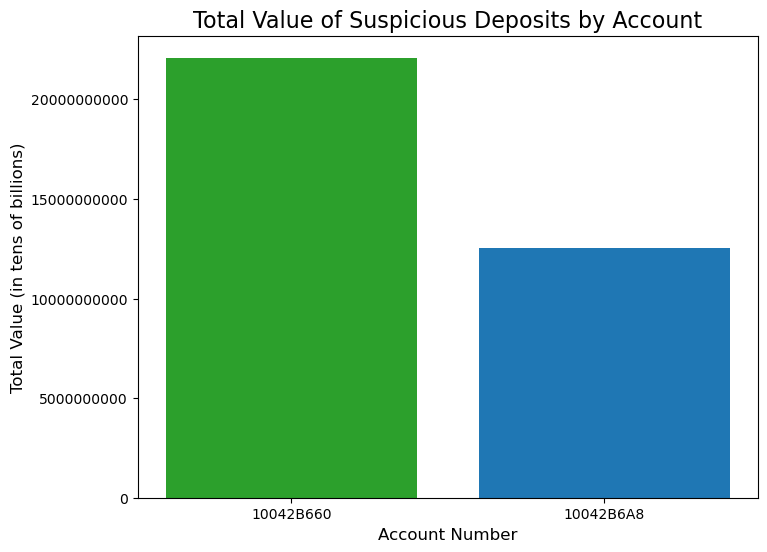

In [49]:
import matplotlib.pyplot as plt

accounts = top_suspects['Account_From']
values = top_suspects['Total_Amount_Received']

plt.figure(figsize=(8, 6))
plt.bar(accounts, values, color=['#2ca02c', '#1f77b4'])

plt.title('Total Value of Suspicious Deposits by Account', fontsize=16)
plt.xlabel('Account Number', fontsize=12)
plt.ylabel('Total Value (in tens of billions)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

plt.savefig('aml_chart.png')

# Display the chart
plt.show()